# House Price Prediction
Predict house prices using property features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('House Price Prediction Dataset.csv')

In [3]:
data.head(5)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [4]:
# Dropping the 'Id' column as it is not useful for prediction
data.drop('Id', axis=1, inplace=True)

In [5]:
data.head(5)

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [6]:
# checking for null values
data.isnull().sum()

Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [7]:
data.head(1)

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919


In [8]:
# X_train and y_train split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns = ['Price']),
                                                    data['Price'],
                                                    test_size=0.2,
                                                    random_state=42)

print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")

X_train shape: (1600, 8), Y_train shape: (1600,)


In [9]:
X_train.head(5)

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
968,4483,4,4,3,1933,Urban,Excellent,No
240,1062,3,3,1,1970,Downtown,Good,No
819,1422,3,4,1,1993,Urban,Good,Yes
692,2658,2,3,1,1972,Rural,Poor,Yes
420,3286,2,4,1,1981,Rural,Excellent,Yes


In [10]:
X_train.isnull().sum() # no null values

Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Specify column names (not DataFrames)
numeric_features = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']
categorical_features = ['Location', 'Condition', 'Garage']

# ✅ Single ColumnTransformer that handles both
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
])


In [12]:
# Creating a pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))
])


In [13]:
# fitting in the pipeline
pipe.fit(X_train, Y_train)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [14]:
# prediting on test set
y_pred = pipe.predict(X_test)

In [15]:
y_pred

array([670819.06012054, 521944.75504272, 527927.35972812, 552909.37684649,
       513131.64139023, 526052.530402  , 501972.59538362, 531015.20861154,
       526496.71530333, 547336.25217384, 555313.3892418 , 594350.87891113,
       566804.16712775, 530991.70546821, 541579.16696193, 483389.18223474,
       582493.94370329, 647632.0993856 , 587123.88845463, 438432.89830937,
       570887.83368341, 421409.98904215, 528060.69559226, 642884.73917679,
       545610.76335291, 618152.17397609, 389084.27848783, 512127.01740601,
       540633.52760545, 516931.33907062, 421346.62326232, 558927.90363873,
       569317.53606489, 553698.14179695, 396193.31592384, 515949.48841533,
       568047.25784247, 466009.7326583 , 595653.38587001, 472683.03145459,
       523481.61141141, 596353.8812014 , 584646.18657282, 543651.6871247 ,
       532236.67723527, 546653.72511399, 541144.09285373, 503209.24429937,
       560945.38154745, 448792.93678335, 558647.91625197, 550066.22934608,
       626462.64331204, 5

# Evaluating the model

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_abso_error = mean_absolute_error(Y_test, y_pred)
root_mean_squ_error = np.sqrt(mean_squared_error(Y_test, y_pred))

print("Mean Absolute Error (MAE):", round(mean_abso_error, 2))
print("Root Mean Squared Error (RMSE):", round(root_mean_squ_error, 2))

Mean Absolute Error (MAE): 245284.36
Root Mean Squared Error (RMSE): 283830.91


# Plotting Actual VS Predicted Prices
plotting using: 
1. scatterplot
2. Lineplot
3. bar chart

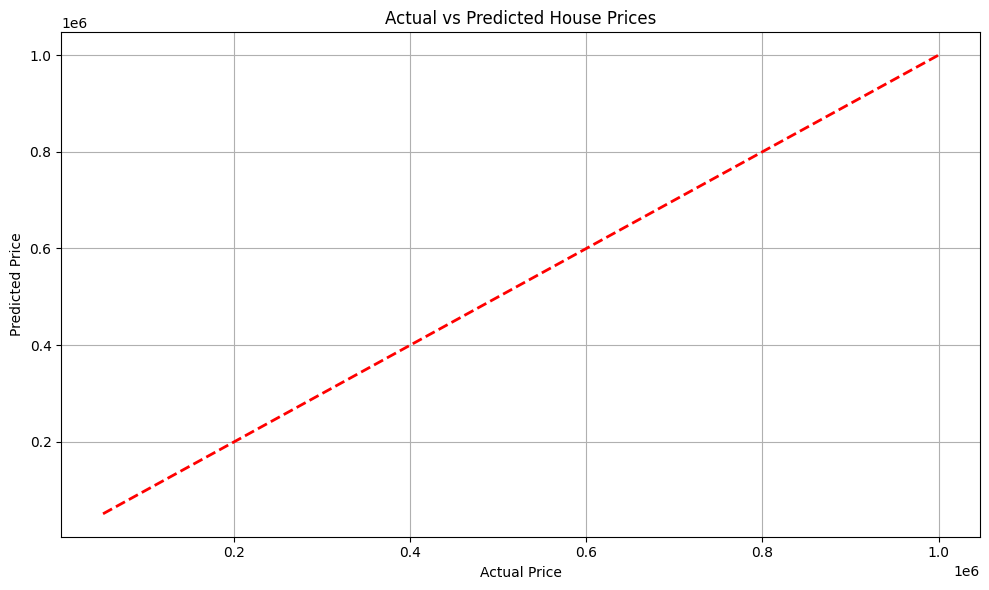

In [17]:
# scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(X=Y_test, Y=y_pred, alpha=0.6, color='royalblue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)  # Ideal predictions
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

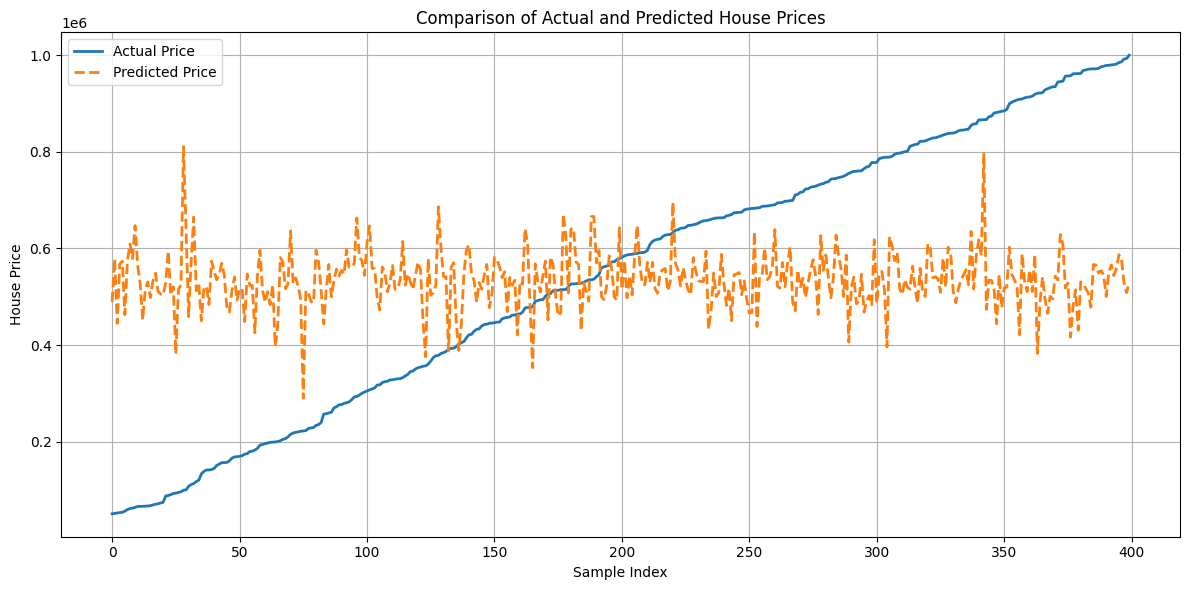

In [18]:
# Plotting using Lineplot
comparison_df = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': y_pred
}).sort_values(by='Actual').reset_index(drop=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Actual'], label='Actual Price', linewidth=2)
plt.plot(comparison_df['Predicted'], label='Predicted Price', linewidth=2, linestyle='--')
plt.title('Comparison of Actual and Predicted House Prices')
plt.xlabel('Sample Index')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()